In [2]:
from pulp import *

In [3]:
prob = LpProblem('Nilai Minimum',LpMinimize)

C:\Python\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


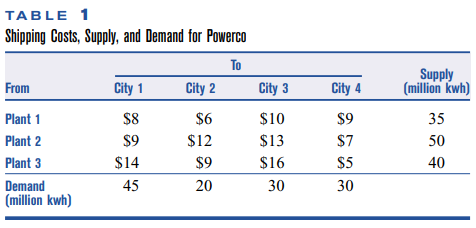

In [4]:
plant = ['plant1','plant2','plant3']   #depot suplai listrik
kota  = ['kota1','kota2','kota3','kota4']  #kota yang akan didistribusikan listrik

In [5]:
supply = {'plant1':35,
         'plant2':50,
         'plant3':40}

In [6]:
demand = {'kota1':45,
          'kota2':20,
          'kota3':30,
          'kota4':30}

In [9]:
cost = {'plant1':{'kota1':8,'kota2':6,'kota3':10,'kota4':9},
        'plant2':{'kota1':9,'kota2':12,'kota3':13,'kota4':17},
        'plant3':{'kota1':14,'kota2':9,'kota3':16,'kota4':5}}
cost

{'plant1': {'kota1': 8, 'kota2': 6, 'kota3': 10, 'kota4': 9},
 'plant2': {'kota1': 9, 'kota2': 12, 'kota3': 13, 'kota4': 17},
 'plant3': {'kota1': 14, 'kota2': 9, 'kota3': 16, 'kota4': 5}}

In [8]:
rute =[(i,j) for i in plant for j in kota]
rute

[('plant1', 'kota1'),
 ('plant1', 'kota2'),
 ('plant1', 'kota3'),
 ('plant1', 'kota4'),
 ('plant2', 'kota1'),
 ('plant2', 'kota2'),
 ('plant2', 'kota3'),
 ('plant2', 'kota4'),
 ('plant3', 'kota1'),
 ('plant3', 'kota2'),
 ('plant3', 'kota3'),
 ('plant3', 'kota4')]

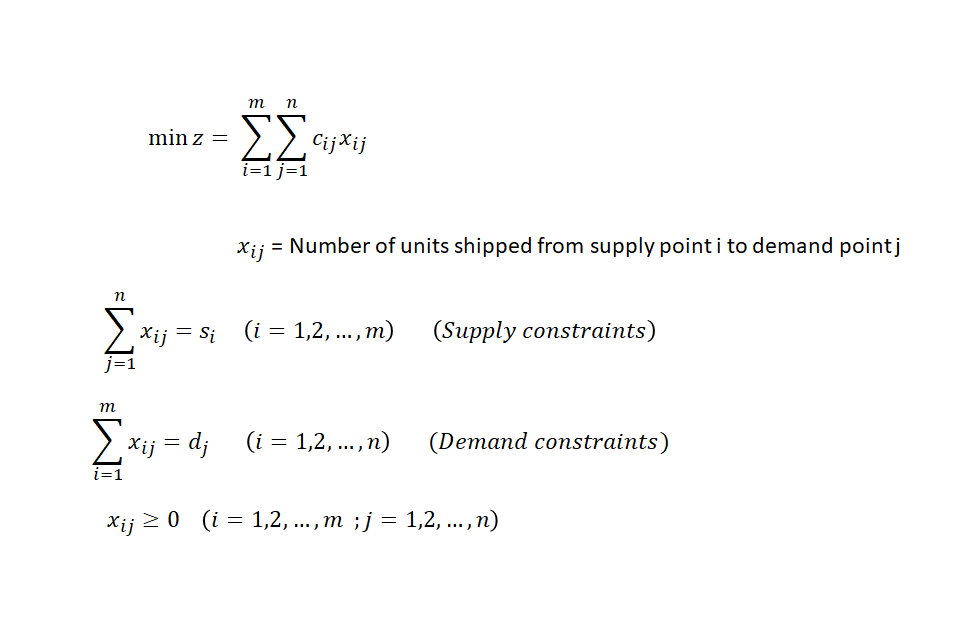

In [9]:
#variabel
var = LpVariable.dicts('banyaknya kwh yang di supply dari',(plant,kota),0,cat=LpInteger)
#Fungsi Objektif
prob += lpSum(var[i][j]*cost[i][j] for (i,j) in rute)
#Fungsi Kendala
for j in kota:
  prob += lpSum(var[i][j] for i in plant) == demand[j]   #constraints untuk demand

for i in plant:
  prob += lpSum(var[i][j] for j in kota) == supply[i]    #constraints untuk supply

In [10]:
prob.solve()

1

In [11]:
print('Status: ',LpStatus[prob.status])

Status:  Optimal


In [12]:
for v in prob.variables():
  if v.varValue > 0 :
    print(v.name,'=',v.varValue)

banyaknya_kwh_yang_di_supply_dari_plant1_kota2 = 10.0
banyaknya_kwh_yang_di_supply_dari_plant1_kota3 = 25.0
banyaknya_kwh_yang_di_supply_dari_plant2_kota1 = 45.0
banyaknya_kwh_yang_di_supply_dari_plant2_kota3 = 5.0
banyaknya_kwh_yang_di_supply_dari_plant3_kota2 = 10.0
banyaknya_kwh_yang_di_supply_dari_plant3_kota4 = 30.0


In [14]:
print('nilai minimum : ',value(prob.objective))

nilai minimum :  1020.0
